In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Reloading the module
import importlib

import Curve
importlib.reload(Curve)
from Curve import Curve2D


import OrthogonalPolynomials
importlib.reload(OrthogonalPolynomials)
from OrthogonalPolynomials import *

In [5]:
# Create a curve class
c = Curve2D(N=10)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c.set_parameter_points(point_type="Legendre")
c.set_BarycentricWeights()
c.set_DiffMatrix()

In [6]:
# Testing reparameterization
def x(t):
    return t

def y(t):
    return t**2

def x_deri(t):
    return 1

def y_deri(t):
    return 2*t


def integrand(t):
    return np.sqrt(x_deri(t)**2 + y_deri(t)**2)

par_range = np.array([0, 1])

c.reparameterization(x, y, x_deri, y_deri, par_range)


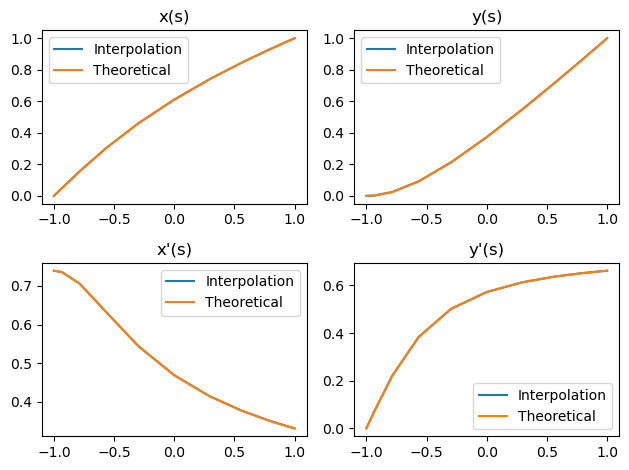

In [7]:
# Testing evaluation given a paramter value
x_th = x(c.parameter_points_original)
y_th = y(c.parameter_points_original)

dx_dt_th = x_deri(c.parameter_points_original)
dy_dt_th = y_deri(c.parameter_points_original)

dt_ds = c.L / 2 / np.sqrt(dx_dt_th**2 + dy_dt_th**2)
x_deri_th = dx_dt_th * dt_ds
y_deri_th = dy_dt_th * dt_ds

x_deri_interp = np.zeros(c.parameter_points.shape)
y_deri_interp = np.zeros(c.parameter_points.shape)

for i, s in enumerate(c.parameter_points):
    x_deri_interp[i] = c.cal_derivatives(s)[0]
    y_deri_interp[i] = c.cal_derivatives(s)[1]
    
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(c.parameter_points, c.x_nodes, label='Interpolation')
ax[0,0].plot(c.parameter_points, x_th, label='Theoretical')
ax[0,0].legend()
ax[0,0].set_title('x(s)')


ax[0,1].plot(c.parameter_points, c.y_nodes, label='Interpolation')
ax[0,1].plot(c.parameter_points, y_th, label='Theoretical')
ax[0,1].legend()
ax[0,1].set_title('y(s)')

ax[1,0].plot(c.parameter_points, x_deri_interp, label='Interpolation')
ax[1,0].plot(c.parameter_points, x_deri_th, label='Theoretical')
ax[1,0].legend()
ax[1,0].set_title("x'(s)")

ax[1,1].plot(c.parameter_points, y_deri_interp, label='Interpolation')
ax[1,1].plot(c.parameter_points, y_deri_th, label='Theoretical')
ax[1,1].legend()
ax[1,1].set_title("y'(s)")

fig.tight_layout()

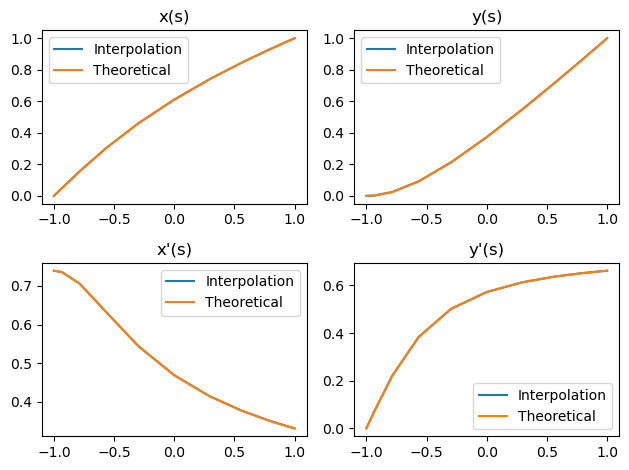

In [8]:
# Testing the node derivative calculation in the class
c.cal_derivatives_node()

x_th = x(c.parameter_points_original)
y_th = y(c.parameter_points_original)

dx_dt_th = x_deri(c.parameter_points_original)
dy_dt_th = y_deri(c.parameter_points_original)

dt_ds = c.L / 2 / np.sqrt(dx_dt_th**2 + dy_dt_th**2)
x_deri_th = dx_dt_th * dt_ds
y_deri_th = dy_dt_th * dt_ds


    
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(c.parameter_points, c.x_nodes, label='Interpolation')
ax[0,0].plot(c.parameter_points, x_th, label='Theoretical')
ax[0,0].legend()
ax[0,0].set_title('x(s)')


ax[0,1].plot(c.parameter_points, c.y_nodes, label='Interpolation')
ax[0,1].plot(c.parameter_points, y_th, label='Theoretical')
ax[0,1].legend()
ax[0,1].set_title('y(s)')

ax[1,0].plot(c.parameter_points, c.x_deri_nodes, label='Interpolation')
ax[1,0].plot(c.parameter_points, x_deri_th, label='Theoretical')
ax[1,0].legend()
ax[1,0].set_title("x'(s)")

ax[1,1].plot(c.parameter_points, c.y_deri_nodes, label='Interpolation')
ax[1,1].plot(c.parameter_points, y_deri_th, label='Theoretical')
ax[1,1].legend()
ax[1,1].set_title("y'(s)")

fig.tight_layout()